## Project : Diamond Price Prediction

### Data Understanding

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [32]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
## importing dataset
df = pd.read_csv("data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
## viewing the data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
## checking for the duplicates
df.duplicated().sum()

0

In [7]:
## checking for missing values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
## removing unnecessary column i.e "id"
df.drop(columns = ['id'], inplace = True)

In [12]:
## segregate the numeric and categorical columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [14]:
numeric_columns = df.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [16]:
categorical_columns = df.select_dtypes(include = 'object').columns
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

### Exploratory Data Analysis

In [17]:
## univariate analysis of numeric columns
df[numeric_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [20]:
## univariate analysis of categorical columns
# finding the unique categories and its count
print("Categorical columns Unique Categories : \n")
for cat_col in categorical_columns:
    print(f"column name :{cat_col} | Count : {len(df[cat_col].unique())} | Unique Categories : {df[cat_col].unique()}")

Categorical columns Unique Categories : 

column name :cut | Count : 5 | Unique Categories : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
column name :color | Count : 7 | Unique Categories : ['F' 'J' 'G' 'E' 'D' 'H' 'I']
column name :clarity | Count : 8 | Unique Categories : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [26]:
print("Unique value counts of each categorical column : \n")
for cat_col in categorical_columns:
    print(df[cat_col].value_counts())
    print("===========================\n")

Unique value counts of each categorical column : 

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64



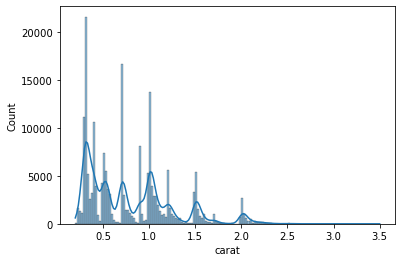

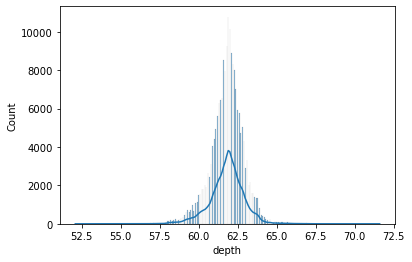

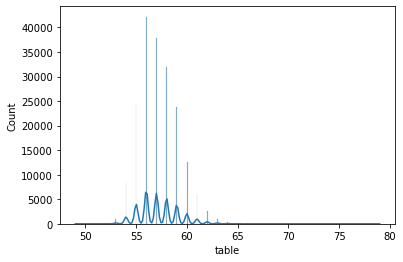

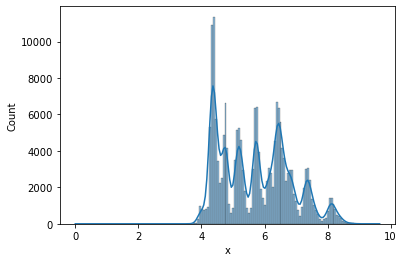

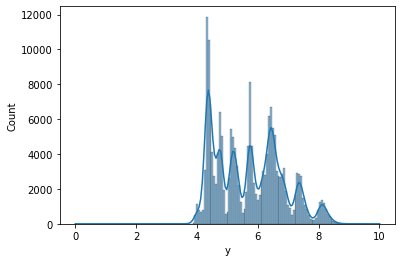

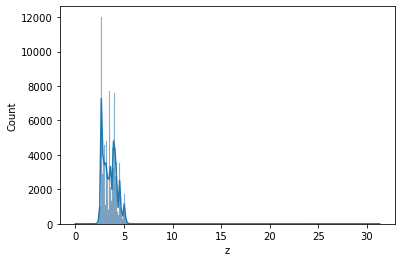

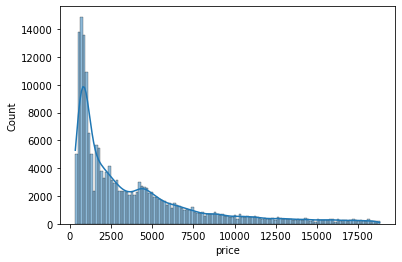

In [29]:
## Distribution of each numeric column
for num_col in numeric_columns :
    sns.histplot(df[num_col] , kde = True)
    plt.show()

In [30]:
## Bivariate analysis :
print(numeric_columns)
print(categorical_columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


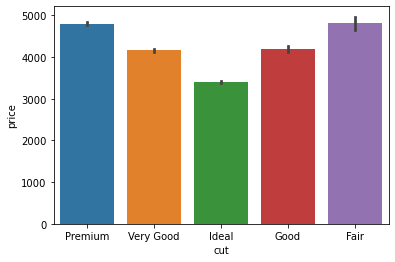

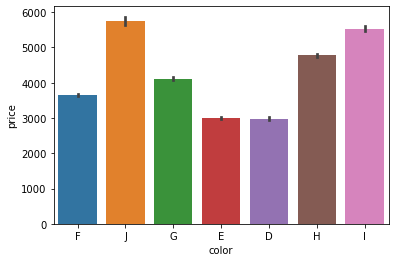

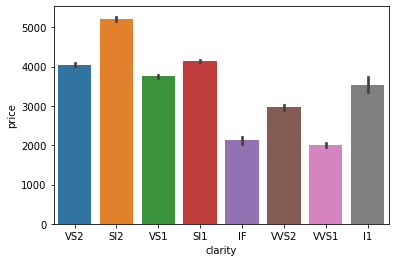

In [34]:
## Average of diamong price for each categorical category
for cat_col in categorical_columns:
    sns.barplot(df[cat_col], df['price'])
    plt.show()

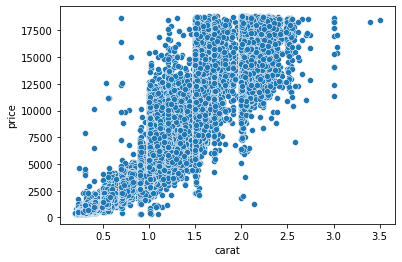

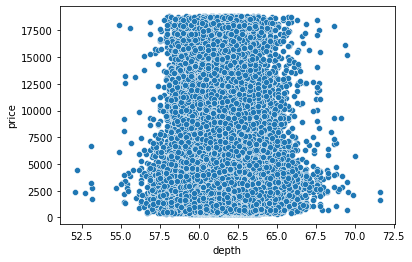

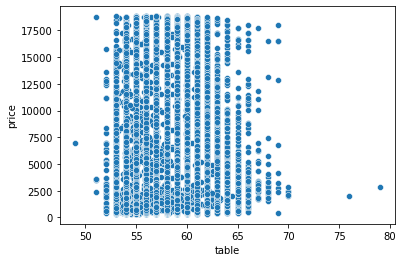

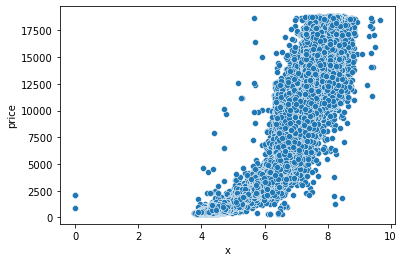

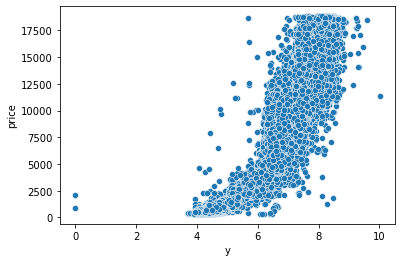

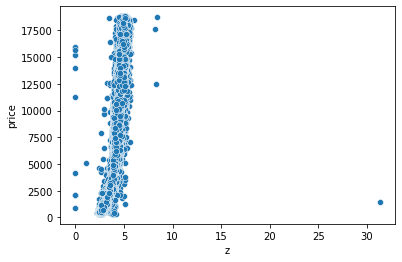

In [38]:
## Change in diamong price with respect to each numeric column
for num_col in numeric_columns:
    if num_col != 'price':
        sns.scatterplot(df[num_col], df['price'])
        plt.show()

<AxesSubplot:>

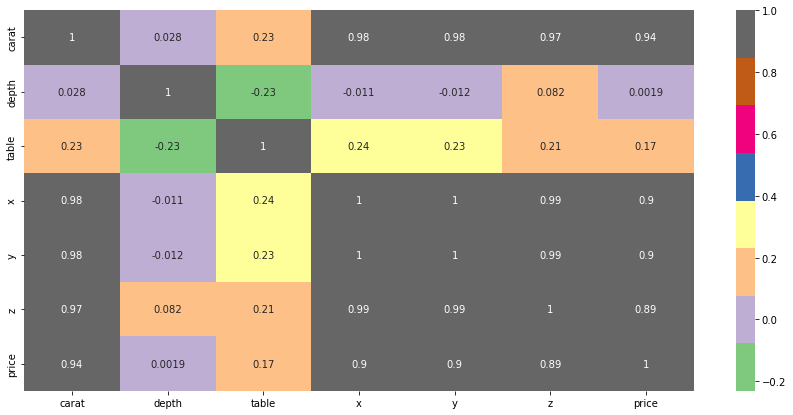

In [55]:
## Multivariate Analysis
# Relation between Diamond Price and independent numeric variables.
plt.figure(figsize = (15,7))
sns.heatmap(df.corr() , annot = True , cmap = 'Accent')

### Feature Encoding

In [56]:
for cat_col in categorical_columns:
    print(f"{cat_col} : {df[cat_col].unique()}")

cut : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color : ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [57]:
## understand the order from an official website of Diamond :
# link : https://www.americangemsociety.org/ags-diamond-grading-system/

## assigning labels to each category of Categorical column
cut_labels = {"Fair": 1, "Good": 2, "Ideal": 3, "Very Good": 4, "Premium": 5}
color_labels = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J':7}
clarity_lables = {'I1':1 , 'SI1' : 2 , 'SI2' : 3 ,'VS1' : 4 , 'VS2' : 5 , 'VVS1' : 6 , 'VVS2' : 7 , 'IF' : 8}


df['cut'] = df['cut'].map(cut_labels)
df['color'] = df['color'].map(color_labels)
df['clarity'] = df['clarity'].map(clarity_lables)

In [58]:
for cat_col in categorical_columns:
    print(f"{cat_col} : {df[cat_col].unique()}")

cut : [5 4 3 2 1]
color : [3 7 4 2 1 5 6]
clarity : [5 3 4 2 8 7 6 1]
